<a href="https://colab.research.google.com/github/Ailton3112/glp/blob/main/Experimento_RevGasToTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
     |████████████████████████████████| 45 kB 1.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640567 sha256=819f1ec1a1ff82afb80c3796c1162aeee8cac27597ce5a0dbec4579825b13344
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


# Análise da base como série temporal

Este notebook converte a base de consumo de Gás GLP na cidade de Teresina entre 2013 e 2022 em uma séries temporal univariada.

In [ ]:
import pandas as pd
import numpy
import warnings # supress warnings
#warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

## 1. Importando a base

In [ ]:
dataset_path = '/content/produtos_clientes.csv'
dataset_ori = pd.read_csv(dataset_path)



In [ ]:
dataset_ori.head()

,client_id,quantity_product,product,value_product,payments,payments_values,total,date,city,state
0,29293,1,GLP 13KG,45.0,Dinheiro,45.00,45.0,2013-04-09 22:17:37,Teresina,Piauí
1,29293,1,GLP 13KG,40.0,Dinheiro,40.00,40.0,2013-05-18 23:12:27,Teresina,Piauí
2,29293,1,GLP 13KG,45.0,Dinheiro,45.00,45.0,2013-06-25 22:21:47,Teresina,Piauí
3,29293,1,GLP 13KG,45.0,Dinheiro,45.00,45.0,2013-08-11 21:51:12,Teresina,Piauí
4,29293,1,GLP 13KG,45.0,Dinheiro,45.00,45.0,2013-10-17 22:57:38,Teresina,Piauí


## 2. Coletando todas as quantidades compradas (quantity_product) e agrupando pela data da compra.

In [ ]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
aux = dataset_ori[dataset_ori['city'] == "Teresina"]
new_dataset = aux[['date','quantity_product']]
new_dataset['date'] = new_dataset['date'].astype('datetime64[ns]').dt.floor('d')
new_dataset['quantity_product'] = new_dataset['quantity_product'].astype('int32')
new_dataset.sort_values(by='date')

,date,quantity_product
100,2013-01-24,1
98,2013-01-24,1
82,2013-01-24,1
97,2013-01-24,1
79,2013-01-24,1
...,...,...
34559,2022-01-17,1
9058,2022-01-17,1
55748,2022-01-17,1
30083,2022-01-17,1


In [ ]:
###TESTE DE AGRUPAMENTO. PODE SER REMOVIDO

##new_dataset[new_dataset['date'] == "2013-01-24	"].groupby(by=['date']).sum()

,quantity_product
date,
2013-01-24,6


In [ ]:
new_dataset.groupby(by=['date']).sum()

,quantity_product
date,
2013-01-24,6
2013-01-25,1
2013-01-29,5
2013-01-30,2
2013-02-02,7
...,...
2022-01-13,22
2022-01-14,11
2022-01-15,33


## 3. Plotando a série agrupada por dia e por mês

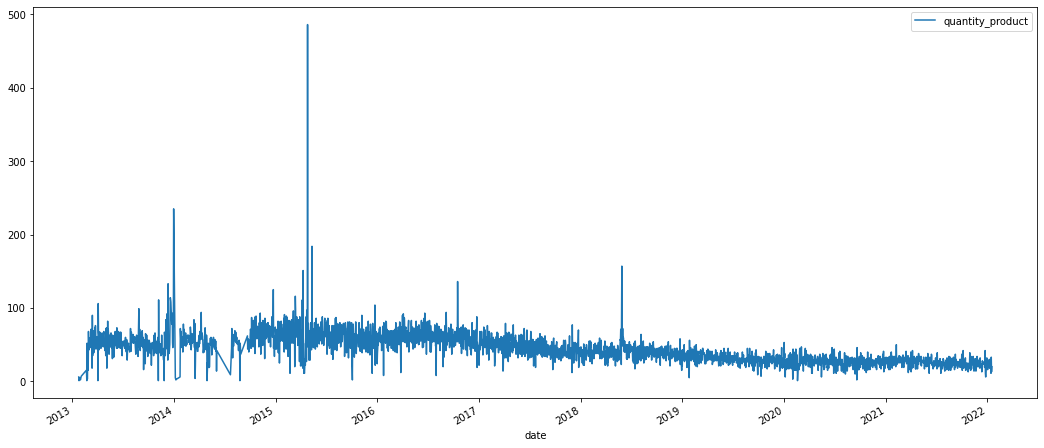

In [ ]:
consumption_ts = new_dataset.groupby(by=['date']).sum() ## POR DIA
consumption_ts
consumption_ts.plot()
#consumption_ts.set_index('date',inplace=True)


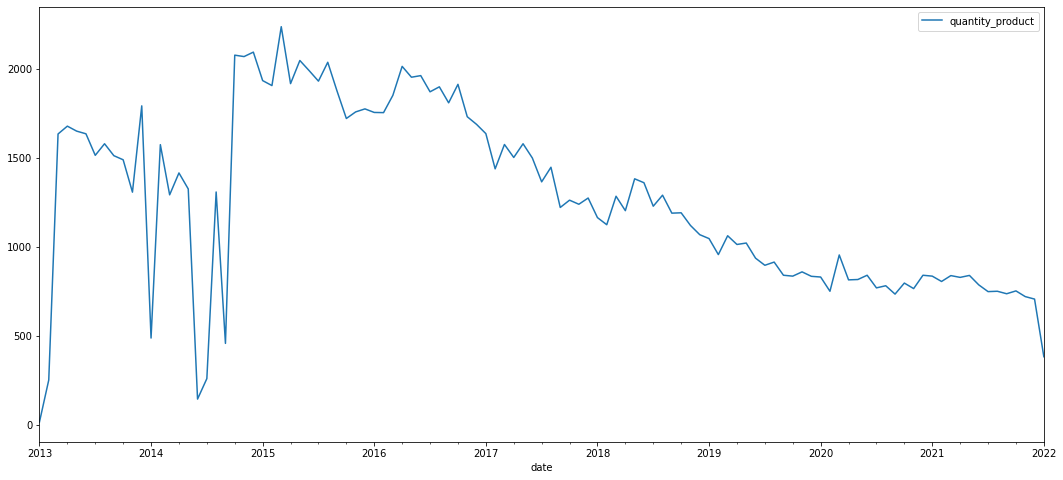

In [ ]:
consumption_ts_ms = consumption_ts.resample('MS').sum()
consumption_ts_ms.plot()


In [ ]:
consumption_ts_ms[consumption_ts_ms['quantity_product'] == 28364]

,quantity_product
date,


## 4. Análise estatística

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


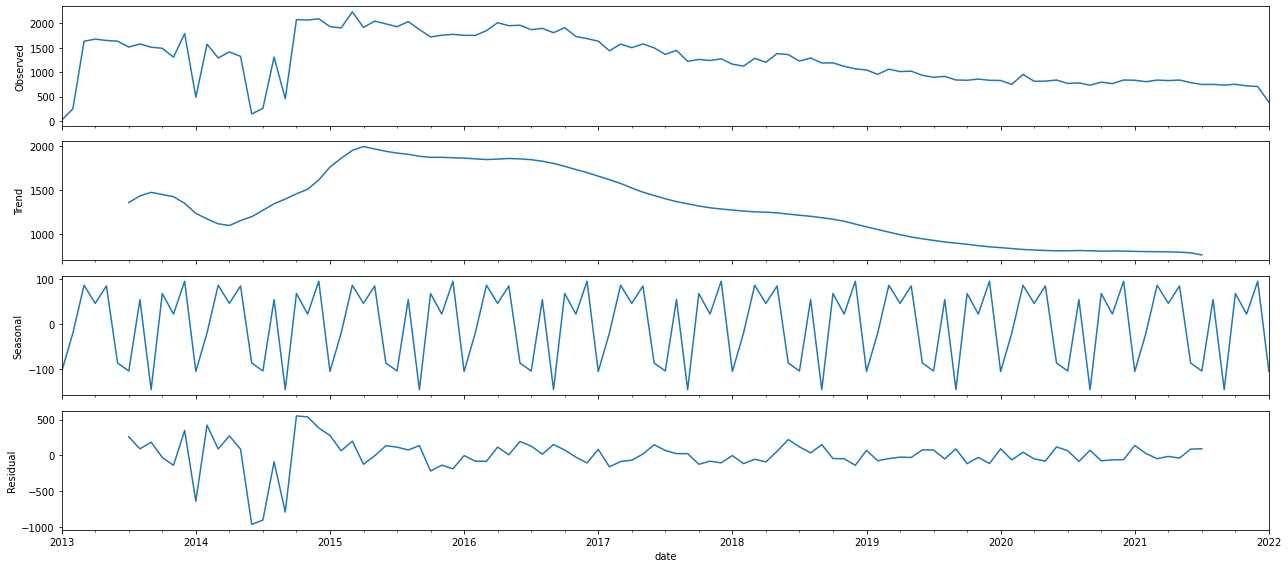

In [ ]:
import statsmodels.api as sm
#sm.tsa.seasonal_decompose(consumption_ts.resample('MS').sum(), model='additive')


decomposition = sm.tsa.seasonal_decompose(consumption_ts_ms, model='additive')
fig = decomposition.plot()

In [ ]:
#from pmdarima.arima.stationarity import ADFTest
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

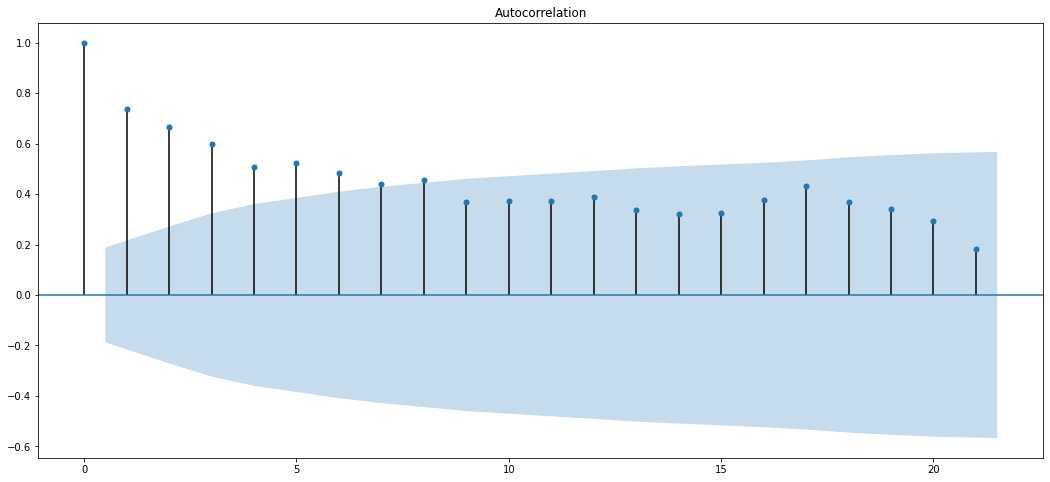

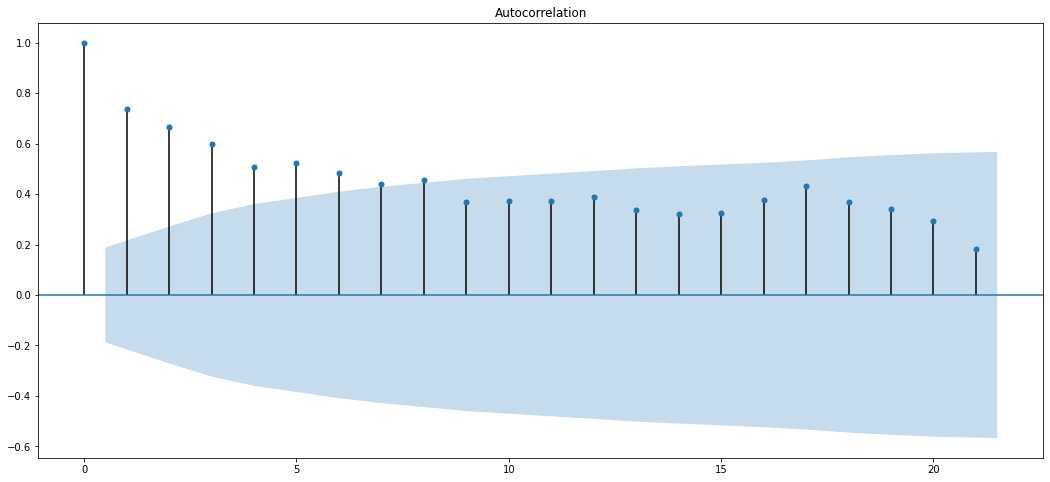

In [ ]:
plot_acf(consumption_ts_ms)
#plot_pacf(consumption_ts.resample('MS').sum())

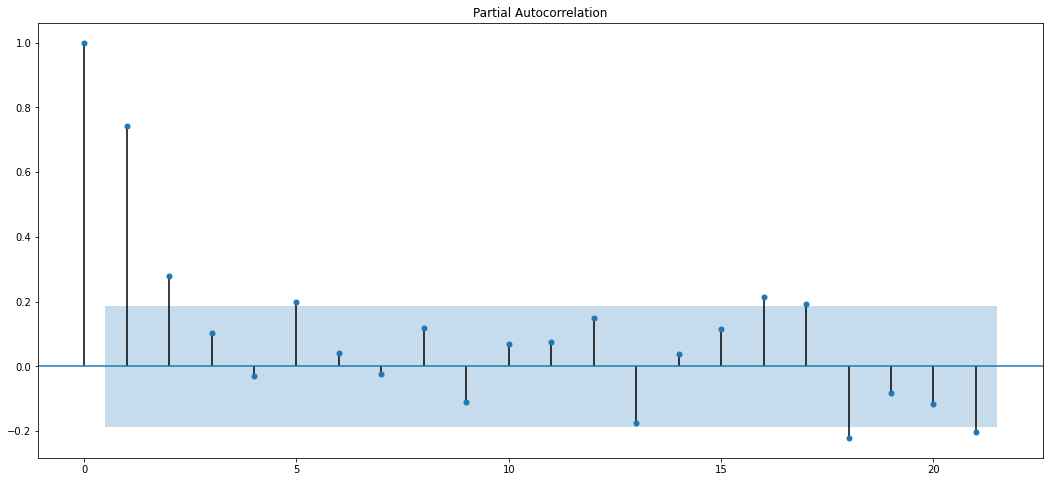

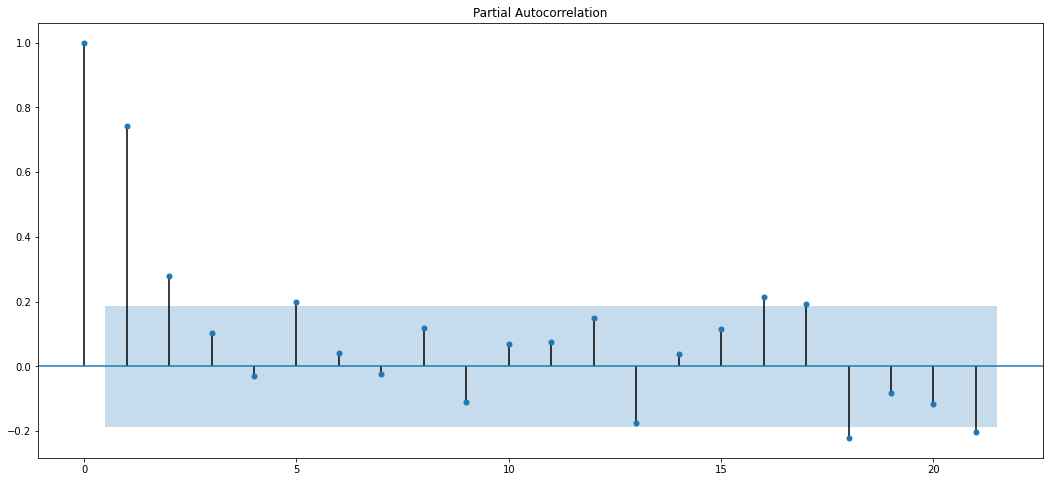

In [ ]:
plot_pacf(consumption_ts_ms)

## 5. Previsão com FB Prophet

In [ ]:
import numpy as np

In [ ]:
'''time_frame = pd.Series(pd.date_range(start='1/8/2020', end='28/2/2022'))
train =  pd.Series(np.zeros(time_frame.shape))
frame = { 'ds': time_frame, 'y': train }
df = pd.DataFrame(frame)
df'''

"time_frame = pd.Series(pd.date_range(start='1/8/2020', end='28/2/2022'))\ntrain =  pd.Series(np.zeros(time_frame.shape))\nframe = { 'ds': time_frame, 'y': train }\ndf = pd.DataFrame(frame)\ndf"

Analisando período entre agosto de 2020 e fevereiro de 2022

In [ ]:
start_date_ms = "2020-08-01"
end_date_ms = "2022-02-28"

In [ ]:
from prophet import Prophet
m = Prophet()
df = consumption_ts[(consumption_ts.index >= pd.Timestamp(start_date_ms) ) & (consumption_ts.index <= pd.Timestamp(end_date_ms) )]
df = df.reset_index(level=0)
df.rename(columns={'date': "ds", 'quantity_product': "y"},inplace=True)

#m.fit(consumption_ts)
df#### TODO: Ajeitar a previsão


,ds,y
0,2020-08-01,21
1,2020-08-02,12
2,2020-08-03,24
3,2020-08-04,22
4,2020-08-05,31
...,...,...
528,2022-01-13,22
529,2022-01-14,11
530,2022-01-15,33
531,2022-01-16,13


In [ ]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
558,2022-02-12
559,2022-02-13
560,2022-02-14
561,2022-02-15
562,2022-02-16


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2020-08-01,24.996921,17.588432,32.701556
1,2020-08-02,19.946113,12.655037,27.254628
2,2020-08-03,28.127806,21.633237,35.091899
3,2020-08-04,25.976138,19.255232,32.932868
4,2020-08-05,26.727043,19.298098,33.993915


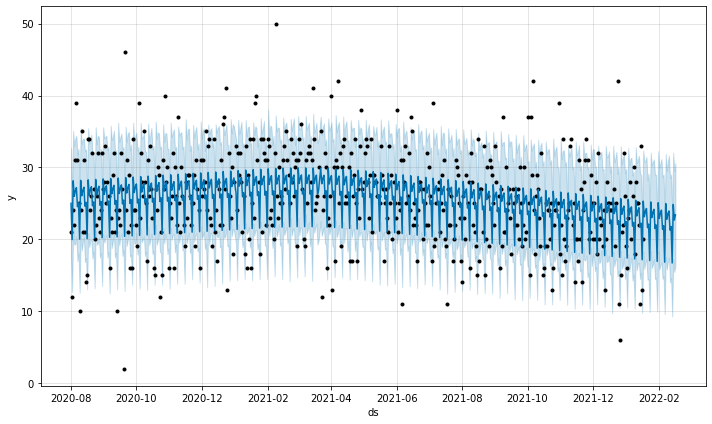

In [ ]:
fig1 = m.plot(forecast)


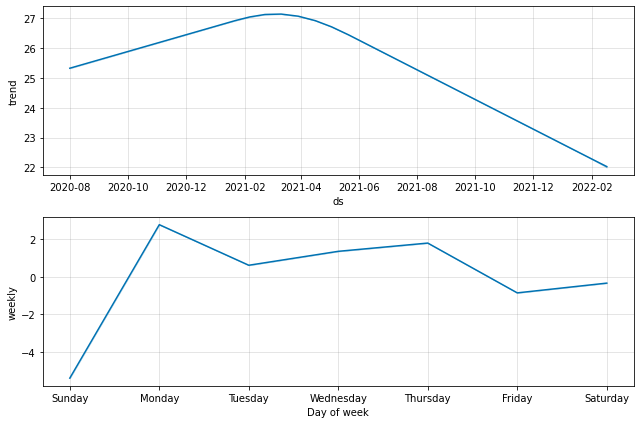

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)